**Hesed Guwn**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 7: Visualizing Radial Basis Function Networks

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from matplotlib.patches import Circle

from scipy.spatial import distance
import scipy.linalg



## Task 1: Load dataset and Initialize variables

### 1a) Import Data
- Below, using numpy [load](https://numpy.org/doc/stable/reference/generated/numpy.load.html) load in the sample data (`train_samples.npy`) and labels (`train_labels.npy`). the training set has 5000 samples.

In [23]:
train_samples = np.load("data/train_samples.npy")
train_labels = np.load("data/train_labels.npy")

### 1b) Create Clusters

1. The number of nodes in the hidden layer will be 27.
2. Because the dataset has 3 classes, the number of output units will be 3.  
3. Create an instance of the [KMeans clustering algorithm class](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), with the number of clusters as the number of nodes in the hidden layer.
    1. Calculate the `cluster_assignments` by fitting the KMeans clustering algorithm to the samples (train_samples) with the classes (train_labels), and predicting which clusters each sample would be assigned to.
    2. Assign the cluster centroids to the variable `prototypes`.  
4. Calcuate the `sigmas` for each cluster, the sigma is the mean distance between the points assigned to a prototype and the prototype.
    1. The shape of sigmas should be an array with the length of the number of hidden nodes.
    2. In the lab you can use [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) to compute distance between the centroid and the datapoints assigned to it.  `cdist` expects two 2D arrays, so you will need to make your prototype a 2D array.

In [27]:
np.random.seed(10)

# Your code here
clusters = KMeans(27)

cluster_assignments = clusters.fit_predict(X = train_samples)

prototypes = clusters.cluster_centers_

sigmas = np.zeros(27)

for i in range(27):
    
    samples = train_samples[cluster_assignments == i]
    
    dist = np.mean(distance.cdist(samples, [prototypes[i]]))
    
    sigmas[i] = dist


C:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 1c) Visualize Clusters

1. Create a scatterplot of the training data with the x coordinates, y coordinates, coloring the points using the class
2. On the same plot as the scatterplot. Draw the clusters
    1. For each cluster, draw a [circle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html) with the center at the prototype coordinates, using the sigma as the radius.  
    2. Add the circle to the axis. [add_patch](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_patch.html)
    3. Set the alpha of the circles to be partially transparent and the facecolor and edgecolor to something easily differentiated from the data.
3. Title the plot.

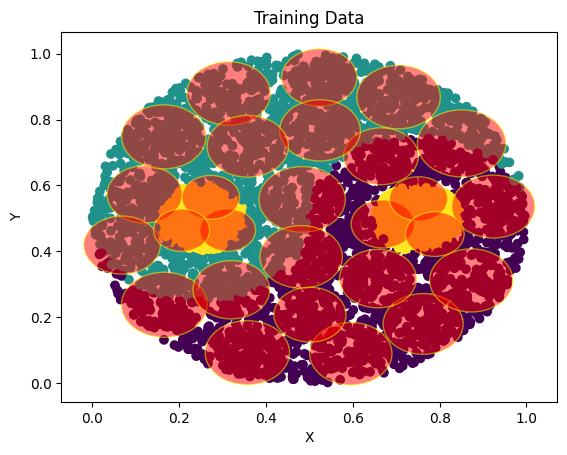

In [29]:
plt.scatter(train_samples[:,0], train_samples[:, 1], c = train_labels)

for i in range(27):
    
    c = (prototypes[i][0], prototypes[i][1])
    
    r = sigmas[i]
    
    circle = Circle(c, r, alpha=0.5, facecolor='red', edgecolor='yellow')
    
    plt.gca().add_patch(circle)


plt.title("Training Data")
    
plt.ylabel('Y')
    
plt.xlabel('X')

plt.show()

### 2c) Visualize Model

1. Create a scatterplot of the training data with the x coordinates, y coordinates, coloring the points using the class
2. On the same plot as the scatterplot. Draw the circles to represent the clusters and color them based on the resulting weights given below.
    1. For each cluster, draw a circle with the center at the prototype coordinates, using the sigma as the radius. 
    2. Set the alpha of the circles to be semi-transparent
    3. Using the weights, determine whether that node represents the first class or the second.  Color the classes different facecolors with a black edgecolor.
3. Title the plot.

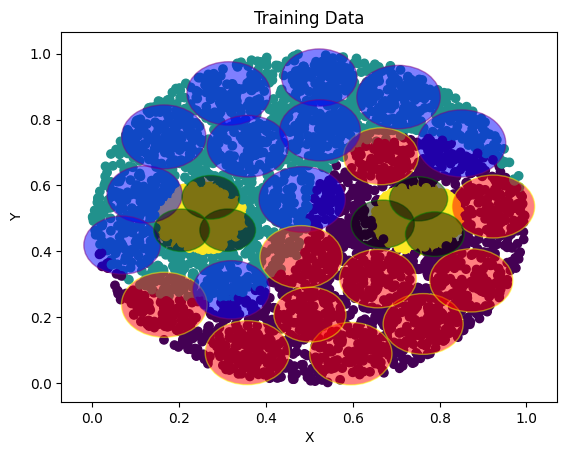

In [31]:
wts = [[ -0.5570424048800952 , 0.3202160585838569 , 0.23682634629623894 ],
[ -0.3171422177115015 , -0.5409465973983156 , 0.8580888151098163 ],
[ 0.6501785675835832 , -0.6140910366378967 , -0.03608753094568832 ],
[ 0.7207473857343744 , -0.6496895118638342 , -0.07105787387053947 ],
[ -0.550871219456205 , 0.5872852054600008 , -0.03641398600379539 ],
[ 0.3532083661950579 , -0.3184038242354737 , -0.03480454195958436 ],
[ 0.5899355040821072 , -0.5743852205393468 , -0.01555028354276178 ],
[ 0.6241629352784015 , -0.7388128108028282 , 0.11464987552442561 ],
[ -0.5322569306148579 , -0.35471462965224054 , 0.886971560267099 ],
[ 0.730718441746891 , -0.6906107736473123 , -0.04010766809957797 ],
[ -0.7550411413571223 , 0.7805198647746734 , -0.025478723417550884 ],
[ -0.6248305033008243 , 0.6931638233004551 , -0.06833331999963012 ],
[ -0.5553261848258912 , -0.44640157348044474 , 1.0017277583063364 ],
[ 0.7930156552508725 , -0.7578950605081061 , -0.03512059474276535 ],
[ -0.18428436965187162 , 0.26802738764012257 , -0.08374301798825065 ],
[ -0.5821044078783354 , 0.7101334403163303 , -0.12802903243799407 ],
[ 0.20359206915010294 , -0.11769817258500735 , -0.08589389656509583 ],
[ -0.014715157691860672 , 0.08139776227155551 , -0.06668260457969426 ],
[ -0.6544859843109327 , 0.6634576887722878 , -0.008971704461356379 ],
[ -0.45232271841183813 , -0.5675279539890884 , 1.0198506724009277 ],
[ -0.39356348955524195 , -0.687363406967407 , 1.0809268965226482 ],
[ 0.7847005643967092 , -0.6707702042343202 , -0.11393036016239 ],
[ -0.6498059530388826 , -0.39718222703802164 , 1.0469881800769036 ],
[ -0.5761006902467009 , 0.5936842147082291 , -0.017583524461527965 ],
[ -0.4488142326141757 , 0.479831856918763 , -0.0310176243045874 ],
[ -0.5627138135343364 , 0.644409090041507 , -0.08169527650716928 ],
[ 0.6179733599227316 , -0.6014047208763773 , -0.016568639046354004 ],
[ 0.47465792633304194 , 0.4995609155277032 , 0.025781158139254634 ]]

# Your code here (it needs to use the wts)
plt.scatter(train_samples[:,0], train_samples[:, 1], c = train_labels)

for i in range(len(prototypes)):
    
    c = (prototypes[i][0], prototypes[i][1])
    
    r = sigmas[i]
    
    if wts[i][0] > wts[i][1] and wts[i][0] > wts[i][2]:
        
        circle = Circle(c, r, alpha=0.5, facecolor='red', edgecolor='yellow')
        
    elif wts[i][1] > wts[i][2] and wts[i][1] > wts[i][2]:
        
        circle = Circle(c, r, alpha=0.5, facecolor='blue', edgecolor='purple')
    else:
        
        circle = Circle(c, r, alpha=0.5, facecolor='black', edgecolor='green')
        
    plt.gca().add_patch(circle)

plt.title("Training Data")
    
plt.ylabel('Y')
    
plt.xlabel('X')

plt.show()